# Exploratory data analysis

## Data and package importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, skew, kurtosis, f
from sklearn.preprocessing import StandardScaler
from statsmodels.multivariate.manova import MANOVA

In [2]:
train_df = pd.read_csv('../../project_datasets/train.csv', index_col='ID_code')
target_made = train_df[train_df.target ==1].iloc[:, 1:]
target_not_made = train_df[train_df.target ==0].iloc[:, 1:]

## Overview of data characteristics

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB


In [4]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## Target Frecuency

A relevant aspect to study is the frequency of data collection on the target event. The target event is a categorical binary variable 'transaction made' / 'transaction not made'. We can see that in the data set there is a clear decompensation in both events which leaves us with an unbalanced binary classification problem.

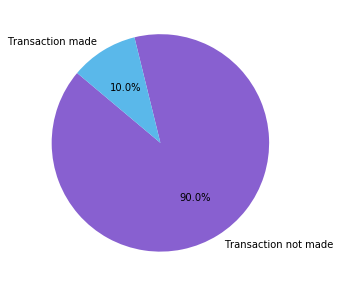

In [5]:
plt.figure(figsize=(5,5))
labels = ['Transaction not made', 'Transaction made']
sizes = list(train_df.groupby('target').agg('count').iloc[:, 1])
plt.pie(sizes, labels=labels, colors=['#8860d0', '#5ab8ea'],
autopct='%1.1f%%', shadow=False, startangle=140)
plt.show()

## Data Exploration

Due to the great number of variables we proceed to obtain a global idea of the behavior of the variables and of the individuals through the basic metrics by column and by row.

### Distribution of the mean, std, min and max for individual

By means of these graphs a clear influence of the presence of normality in the accumulation of the data can be observed. This may indicate that most of the variables follow a normal distribution.

In [6]:
def remove_spines(ax):
    ## removing the spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ## removing the tick marks
    ax.tick_params(bottom=False, left=False)
    

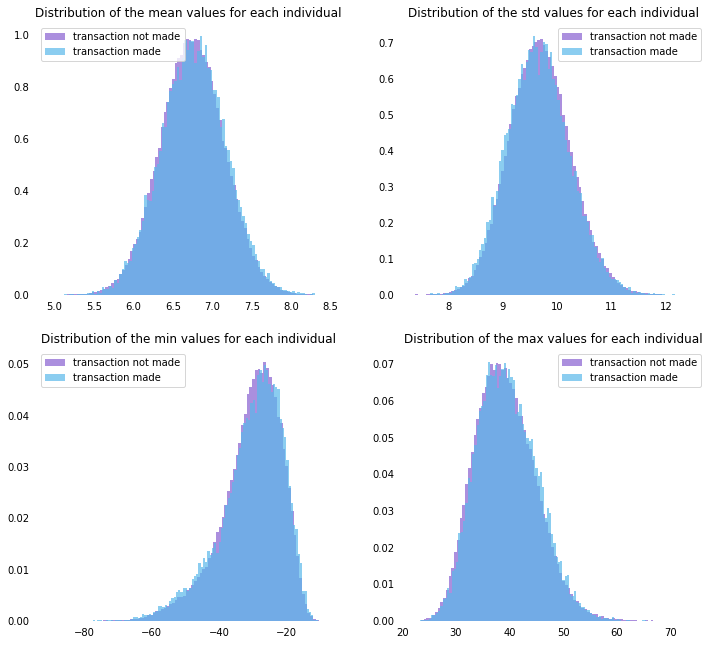

In [7]:
plt.figure(figsize=(12, 11))
plt.subplot(221)
target_not_made.iloc[:, 1:].mean(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].mean(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the mean values for each individual')
plt.grid(False)

plt.subplot(222)
target_not_made.iloc[:, 1:].std(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].std(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the std values for each individual')
plt.grid(False)

plt.subplot(223)
target_not_made.iloc[:, 1:].min(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].min(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the min values for each individual')
plt.grid(False)

plt.subplot(224)
target_not_made.iloc[:, 1:].max(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].max(axis=1).hist(bins=100, alpha=0.7, density=1, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the max values for each individual')
plt.grid(False)

### Distribution of the mean, std, min and max for each variable

For its part, heterogeneity can be observed in the variables where it can be seen that a wide range of values occurs.

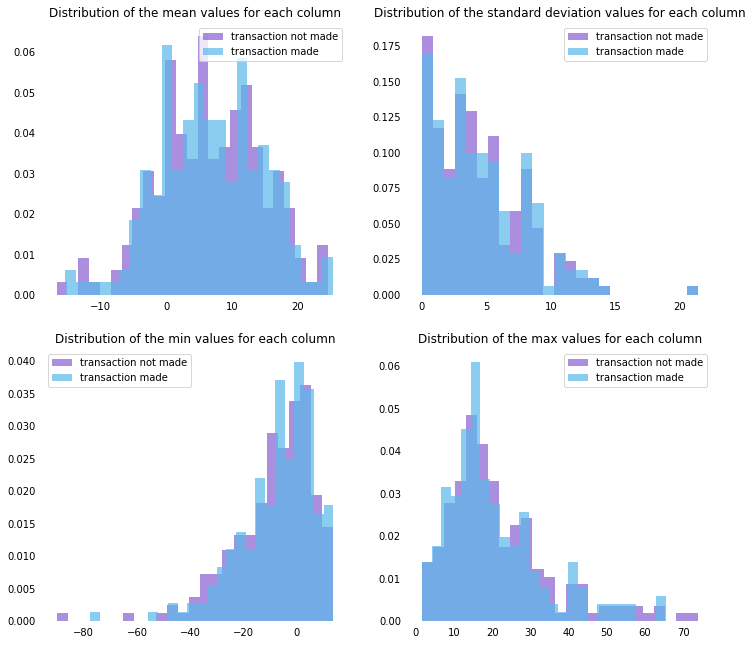

In [8]:
plt.figure(figsize=(12, 11))
plt.subplot(221)
target_not_made.iloc[:, 1:].mean(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].mean(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the mean values for each column')
plt.grid(False)

plt.subplot(222)
target_not_made.iloc[:, 1:].std(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].std(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the standard deviation values for each column')
plt.grid(False)

plt.subplot(223)
target_not_made.iloc[:, 1:].min(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].min(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the min values for each column')
plt.grid(False)

plt.subplot(224)
target_not_made.iloc[:, 1:].max(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction not made', color='#8860d0')
target_made.iloc[:, 1:].max(axis=0).hist(bins=25, alpha=0.7, density=True, label='transaction made', color='#5ab8ea')
plt.legend()
remove_spines(plt.gca())
plt.title('Distribution of the max values for each column')
plt.grid(False)

## Correlation

### Between variables

It can be seen that the correlation between the dependent variables in the data set is very low

In [9]:
between_variables_corr = np.abs(np.array(train_df.corr()))[np.triu_indices(200, k = 1)]
pd.Series(between_variables_corr).sort_values(ascending=False)

81       8.091733e-02
139      7.407963e-02
12       6.948928e-02
6        6.673085e-02
110      6.427530e-02
             ...     
15125    3.116544e-07
5310     1.772502e-07
15911    1.313947e-07
1538     5.942735e-08
12389    2.703975e-08
Length: 19900, dtype: float64

### Between variables and target

A high correlation between the dependent variables and the target variable is also not observed

In [10]:
np.abs(train_df.corr()).loc['var_0':, 'target'].sort_values(ascending=False)

var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
             ...   
var_38     0.000970
var_17     0.000864
var_30     0.000638
var_27     0.000582
var_185    0.000053
Name: target, Length: 200, dtype: float64

#### Plots to study the capacity of classification of the variables according to their correlation

It can be observed in the graphs that the capacity of classification of the variables is not very big even when we choose the best ones, this is due to the low existing correlation. Even so we can see that there is a clear difference between those that have a higher correlation with the target value.

##### Most correlated variables

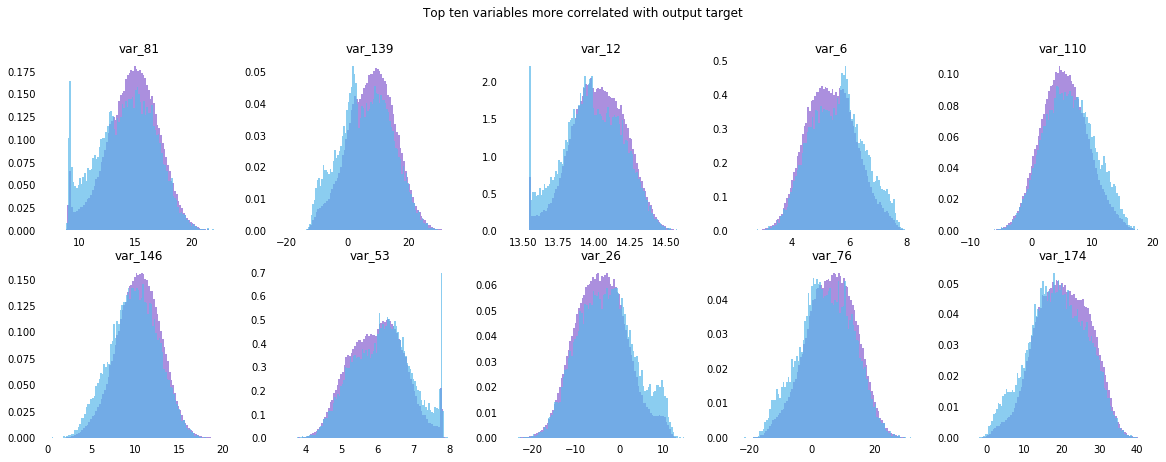

In [11]:
corr_target = train_df.corr().loc[:, 'target']
most = corr_target.apply(abs).sort_values(ascending=False).head(11).index[1:]
least = corr_target.apply(abs).sort_values(ascending=False).tail(10).index

plt.figure(figsize=(20,7))
i = 1
for variable in most:
    plt.subplot(2,5,i)
    target_not_made.loc[:, variable].hist(density=1, bins=100, alpha=0.7, color='#8860d0')
    target_made.loc[:, variable].hist(density=1, bins=100, alpha=0.7, color='#5ab8ea')
    plt.title(str(variable))
    plt.grid(False)
    remove_spines(plt.gca())
    i += 1
plt.suptitle('Top ten variables more correlated with output target')
plt.show()

##### Least correlated variables

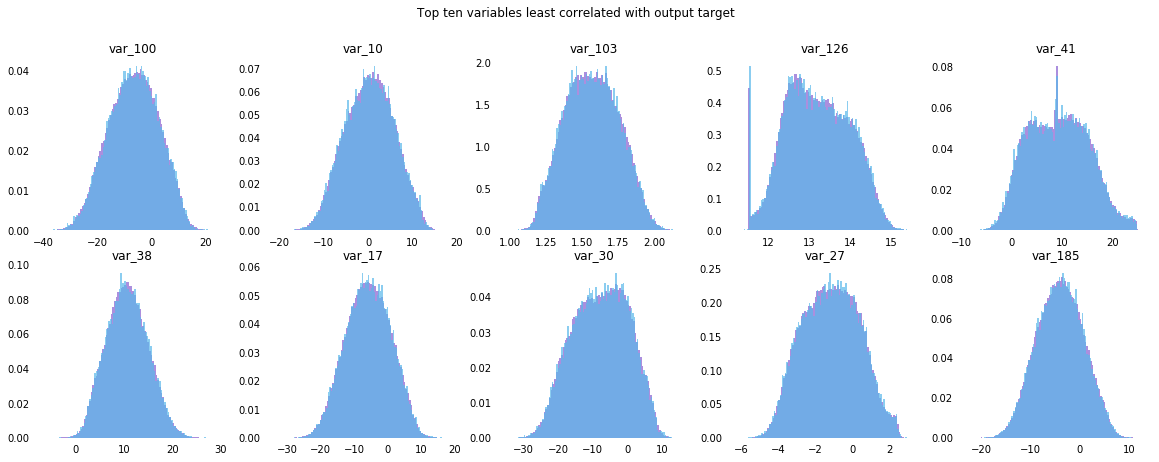

In [12]:
plt.figure(figsize=(20,7))
i = 1
for variable in least:
    plt.subplot(2,5,i)
    target_not_made.loc[:, variable].hist(density=1, bins=100, alpha=0.7, color='#8860d0')
    target_made.loc[:, variable].hist(density=1, bins=100, alpha=0.7, color='#5ab8ea')
    plt.title(str(variable))
    plt.grid(False)
    remove_spines(plt.gca())
    i += 1
plt.suptitle('Top ten variables least correlated with output target')
plt.show()

## Normality

Due to the sample size of the data set it is not advisable to use tests such as  Shapiro (“scipy.stats.shapiro — SciPy v1.5.4 Reference Guide,” n.d.). For this reason, the normality of the variables that compose the data set is studied through skewness and kurtosis measurements.

It is obtained that for the 200 variables the skewness is close to zero in all of them. On the other hand it is obtained that Fisher's kurtosis is close to zero. This indicates us that the variables have a normal distribution or at least sufficiently approximate as to be able to suppose normality.

Based on the above result we can assume that the data sets follow a multivariate normal distribution. The condition of normality for the variables that compose the data set is necessary but not sufficient. Even so, in most practical cases it is assumed that the dataset follows a multivariate normal distribution when this condition occurs (Hair, 2014), (Manly and Navarro Alberto, 2017) 

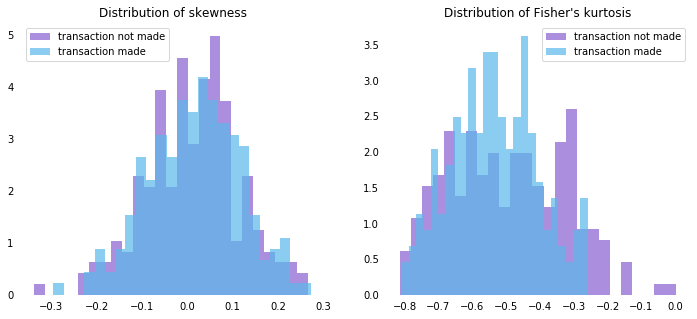

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist([skew(target_not_made.loc[:, c]) for c in target_not_made.columns], bins = 25, alpha=0.7,
         density=True, label='transaction not made', color='#8860d0')
plt.hist([skew(target_made.loc[:, c]) for c in target_made.columns], bins = 25, alpha=0.7,
         density=True, label='transaction made', color='#5ab8ea')
plt.title('Distribution of skewness')
remove_spines(plt.gca())
plt.legend()

plt.subplot(122)
plt.hist([kurtosis(target_not_made.loc[:, c], fisher=True) for c in target_not_made.columns], bins = 25, alpha=0.7,
         density=True, label='transaction not made' ,color='#8860d0')
plt.hist([kurtosis(target_made.loc[:, c], fisher=True) for c in target_made.columns], bins = 25, alpha=0.7,
         density=True, label='transaction made', color='#5ab8ea')
plt.title("Distribution of Fisher's kurtosis")
remove_spines(plt.gca())
plt.legend()
plt.show()

For the skewness is acceptable to assume normal if the value is in the range [-1, 1]. For kurtosis is accepted the range [-2, 2]. Because the sample size >300 is not considered the use of z values (Yousef Obeidat et al., 2017) (Kim, 2013).

## Comparison of variation

To study if there are significant differences between both samples it is necessary to study if both have an equal variance. This occurs because it is a necessary condition for tests such as MANOVA or Hotelling's T² test.

For this purpose, the test proposed by Van Valen is applied, which is a generalization of Levene's test for two multivariate samples. This is because it is a more robust test than the Box's M-test (Manly and Navarro Alberto, 2017)

H<sub>0</sub>: There is no difference between the variances of the two samples <br />
H<sub>a</sub>: The variance of both samples is not the same

In [14]:
def van_valen_levene_test(x_ij, y_ij):
    # Van Valen's alternative Levene's test for two samples with p-variables
    # Robust alternative to Box's M-test
    # To obtain a more robust test median is used instead of mean for each variable
    # The values are standarized with scikit-learn StandardScaler()
    scaler = StandardScaler()
    x_ij = scaler.fit_transform(x_ij)
    x_j = np.median(x_ij, axis=0).reshape(1, x_ij.shape[1])
    d_ij = np.sqrt(np.sum(np.square(x_ij - x_j), axis=1))
    
    y_ij = scaler.fit_transform(y_ij)
    y_j = np.median(y_ij, axis=0).reshape(1, y_ij.shape[1])
    e_ij = np.sqrt(np.sum(np.square(y_ij - y_j), axis=1))
    result = ttest_ind(d_ij, e_ij)
    print('Test statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

In [15]:
van_valen_levene_test(np.array(target_not_made), np.array(target_made))

Test statistic: -0.1836142710255238
p-value: 0.8543162529524672


As a result we see that the null hypothesis is not rejected so it is possible to compare both samples without applying any transformation.

## Comparasion of means

Once it has been established that both samples have an equal variance it is possible to examine whether or not both samples have a significant difference. For this purpose, the Hotelling's T² test is used

H<sub>0</sub>: There is no difference between the means of the two samples <br />
H<sub>a</sub>: The samples have different means

### Hotelling's T² test

In [16]:
def two_sample_T2_test(X, Y):
    nx, p = X.shape
    ny, _ = Y.shape
    delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    t_squared = (nx*ny)/(nx+ny) * np.matmul(np.matmul(delta.transpose(), np.linalg.inv(S_pooled)), delta)
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx + ny - p - 1}\np-value: {p_value}")

In [17]:
two_sample_T2_test(target_not_made, target_made)

Test statistic: 221.87892141756996
Degrees of freedom: 200 and 199799
p-value: 1.1102230246251565e-16


### MANOVA

In [18]:
manova = MANOVA(train_df.iloc[:, 1:], train_df.iloc[:, 1])
print(manova.mv_test())

                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
           x0                  Value         Num DF     Den DF          F Value         Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 200.0000 199800.0000 97806435385719104.0000 0.0000
         Pillai's trace              1.0000 200.0000 199800.0000 97806435385719120.0000 0.0000
 Hotelling-Lawley trace 97904339725444.5625 200.0000 199800.0000 97806435385719120.0000 0.0000
    Roy's greatest root 97904339725444.5625 200.0000 199800.0000 97806435385719120.0000 0.0000



As a result we can reject the null hypothesis and obtain as a result that there is a significant difference between both samples

## Bibliography
  Hair, J.F. (Ed.), 2014. Multivariate data analysis, 7. ed., Pearson new internat. ed. ed, Pearson custom library. Pearson, Harlow.
  
  Kim, H.-Y., 2013. Statistical notes for clinical researchers: assessing normal distribution (2) using skewness and kurtosis. Restorative Dentistry & Endodontics 38, 52–54. https://doi.org/10.5395/rde.2013.38.1.52
  
  Manly, B.F.J., Navarro Alberto, J.A., 2017. Multivariate statistical methods: a primer, Fourth edition. ed. CRC Press, Taylor & Francis Group, Boca Raton.
  
  scipy.stats.shapiro — SciPy v1.5.4 Reference Guide [WWW Document], n.d. URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html (accessed 11.26.20).
  
  Yousef Obeidat, B., Bahjat Abdallah, A., Osama Aqqad, N., Akhoershiedah, A.H.O.M., Maqableh, M., 2017. The Effect of Intellectual Capital on Organizational Performance: The Mediating Role of Knowledge Sharing. CN 09, 1–27. https://doi.org/10.4236/cn.2017.91001